In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [50]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [51]:
more_county = pd.read_csv('../data/more_county.csv')

In [52]:
more_county.head()

,County,LandArea_sqmi,RuralUrban_ContinuumCode,Percent_CollegeGraduates (2015-2019),UnemploymentRate (2021),Median_Household_Income (2015-2019),Median_GrossRent (2015-2019),Population Estimate (2021),Population Estimate (22-29 years),Population Estimate (30-44 years)
0,adair,569.27,8,18.5,2.7,57977,585,6888,594,1164
1,adams,423.44,9,15.6,2.8,53385,549,3496,316,568
2,allamakee,639.08,6,17.8,3.5,56240,620,13548,1127,2165
3,appanoose,497.29,7,16.3,4.3,41672,624,12335,1037,1900
4,audubon,442.96,8,17.1,3.1,53197,582,5338,473,806


In [53]:
more_county.rename(columns = {'Percent_CollegeGraduates (2015-2019)':'Percent_CollegeGraduates',
                              'UnemploymentRate (2021)':'UnemploymentRate_2021',
                              'Median_Household_Income (2015-2019)':'Median_Household_Income_2019',
                              'Median_GrossRent (2015-2019)':'Median_GrossRent_2019',
                              'Population Estimate (2021)':'Population_Estimate_2021',
                              'Population Estimate (22-29 years)':'Population Estimate_22to29yrs',
                              'Population Estimate (30-44 years)':'Population Estimate_3-to44yrs',}, inplace = True)

In [54]:
more_county.head()

,County,LandArea_sqmi,RuralUrban_ContinuumCode,Percent_CollegeGraduates,UnemploymentRate_2021,Median_Household_Income_2019,Median_GrossRent_2019,Population_Estimate_2021,Population Estimate_22to29yrs,Population Estimate_3-to44yrs
0,adair,569.27,8,18.5,2.7,57977,585,6888,594,1164
1,adams,423.44,9,15.6,2.8,53385,549,3496,316,568
2,allamakee,639.08,6,17.8,3.5,56240,620,13548,1127,2165
3,appanoose,497.29,7,16.3,4.3,41672,624,12335,1037,1900
4,audubon,442.96,8,17.1,3.1,53197,582,5338,473,806


# Data Analysis

# By County Analysis

In [55]:
county_simple = more_county[['County','UnemploymentRate_2021','Percent_CollegeGraduates','Median_Household_Income_2019','Median_GrossRent_2019']]
county_simple.head()

,County,UnemploymentRate_2021,Percent_CollegeGraduates,Median_Household_Income_2019,Median_GrossRent_2019
0,adair,2.7,18.5,57977,585
1,adams,2.8,15.6,53385,549
2,allamakee,3.5,17.8,56240,620
3,appanoose,4.3,16.3,41672,624
4,audubon,3.1,17.1,53197,582


In [56]:
county_simple = county_simple.set_index('County')

In [57]:
county_simple.head()

,UnemploymentRate_2021,Percent_CollegeGraduates,Median_Household_Income_2019,Median_GrossRent_2019
County,,,,
adair,2.7,18.5,57977,585
adams,2.8,15.6,53385,549
allamakee,3.5,17.8,56240,620
appanoose,4.3,16.3,41672,624
audubon,3.1,17.1,53197,582


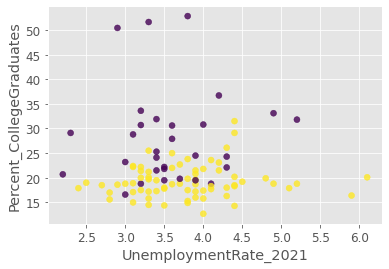

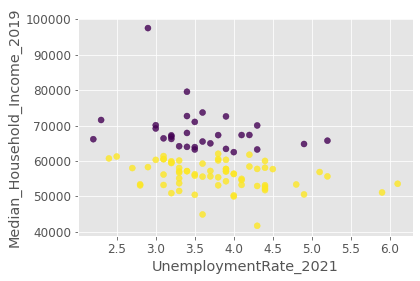

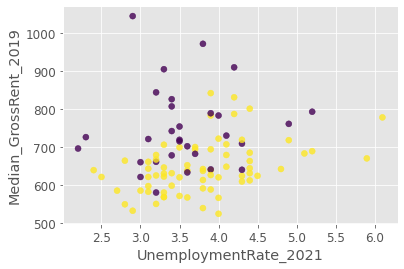

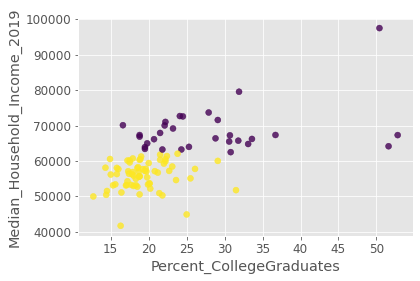

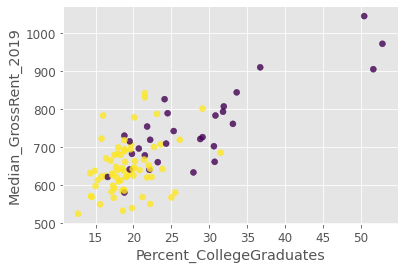

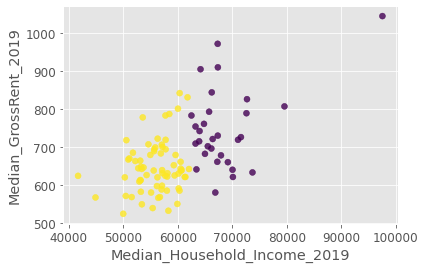

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.set_params(n_clusters=2)
kmeans.fit(county_simple)
kmeans.labels_

plt.scatter(county_simple[['UnemploymentRate_2021']], county_simple[['Percent_CollegeGraduates']], c=kmeans.labels_, alpha=0.8)
plt.xlabel('UnemploymentRate_2021')
plt.ylabel('Percent_CollegeGraduates')
plt.show()

plt.scatter(county_simple[['UnemploymentRate_2021']], county_simple[['Median_Household_Income_2019']], c=kmeans.labels_, alpha=0.8)
plt.xlabel('UnemploymentRate_2021')
plt.ylabel('Median_Household_Income_2019')
plt.show()


plt.scatter(county_simple[['UnemploymentRate_2021']], county_simple[['Median_GrossRent_2019']], c=kmeans.labels_, alpha=0.8)
plt.xlabel('UnemploymentRate_2021')
plt.ylabel('Median_GrossRent_2019')
plt.show()

plt.scatter(county_simple[['Percent_CollegeGraduates']], county_simple[['Median_Household_Income_2019']], c=kmeans.labels_, alpha=0.8)
plt.xlabel('Percent_CollegeGraduates')
plt.ylabel('Median_Household_Income_2019')
plt.show()

plt.scatter(county_simple[['Percent_CollegeGraduates']], county_simple[['Median_GrossRent_2019']], c=kmeans.labels_, alpha=0.8)
plt.xlabel('Percent_CollegeGraduates')
plt.ylabel('Median_GrossRent_2019')
plt.show()

plt.scatter(county_simple[['Median_Household_Income_2019']], county_simple[['Median_GrossRent_2019']], c=kmeans.labels_, alpha=0.8)
plt.xlabel('Median_Household_Income_2019')
plt.ylabel('Median_GrossRent_2019')
plt.show()